# Reinforcement Learning

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Stitch-bleu/inde-577-project/edit/main/Reinforcement%20Learning/Tabular%20versus%20Deep%20Learning%20Methods/Reinforcement_Learning.ipynb)

## Introduction
Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. Through trial and error, the agent receives rewards for beneficial actions and penalties for undesirable ones. The objective is to learn an optimal strategy, or policy, to maximize rewards over time.

In this example, we tackle the FrozenLake problem using a Q-learning algorithm. The FrozenLake environment consists of a 4x4 grid where the agent starts at one location and must reach a goal, navigating a path on slippery ice. Along the way, there are frozen tiles (safe) and holes (unsafe), and each move has a probability of slipping, adding to the challenge. The agent's goal is to find the safest and most efficient path from start to goal, maximizing its rewards by avoiding holes.

## 1. Data

In [7]:
!pip install gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827621 sha256=0d21e0aa34d5935f0b4a0c0062dbe6e5fcb12583f51c27d96a0a94c00423cc74
  Stored in directory: /Users/stitchbleu/Library/Caches/pip/wheels/95/51/6c/9bb05ebbe7c5cb8171dfaa3611f32622ca4658d53f31c79077
Successfully built gym


In [1]:
import gym
import numpy as np

# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)  # Set is_slippery=False for deterministic actions
env.reset()

# Environment details
print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)


Action Space: Discrete(4)
Observation Space: Discrete(16)


## 2. Hyperparameter

In [12]:
# Q-learning parameters
num_episodes = 100000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.001


q_table = np.zeros([env.observation_space.n, env.action_space.n])

print("Initial Q-Table:")
print(q_table)
env = gym.make("FrozenLake-v1", is_slippery=False)


Initial Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [14]:
# Training loop
rewards = [] 

for episode in range(num_episodes):
    state = env.reset()  
    state = int(state[0]) if isinstance(state, tuple) else int(state)  
    total_reward = 0
    done = False

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(q_table[state, :])  

        result = env.step(action)
        next_state, reward, done = result[0], result[1], result[2]
        next_state = int(next_state[0]) if isinstance(next_state, tuple) else int(next_state)  

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards.append(total_reward)

    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon:.2f}")

print("Training complete.")


Episode: 100, Total Reward: 0.0, Epsilon: 0.95
Episode: 200, Total Reward: 0.0, Epsilon: 0.90
Episode: 300, Total Reward: 0.0, Epsilon: 0.86
Episode: 400, Total Reward: 0.0, Epsilon: 0.82
Episode: 500, Total Reward: 0.0, Epsilon: 0.78
Episode: 600, Total Reward: 0.0, Epsilon: 0.74
Episode: 700, Total Reward: 0.0, Epsilon: 0.70
Episode: 800, Total Reward: 0.0, Epsilon: 0.67
Episode: 900, Total Reward: 0.0, Epsilon: 0.64
Episode: 1000, Total Reward: 0.0, Epsilon: 0.61
Episode: 1100, Total Reward: 1.0, Epsilon: 0.58
Episode: 1200, Total Reward: 0.0, Epsilon: 0.55
Episode: 1300, Total Reward: 0.0, Epsilon: 0.52
Episode: 1400, Total Reward: 1.0, Epsilon: 0.50
Episode: 1500, Total Reward: 0.0, Epsilon: 0.47
Episode: 1600, Total Reward: 0.0, Epsilon: 0.45
Episode: 1700, Total Reward: 0.0, Epsilon: 0.43
Episode: 1800, Total Reward: 0.0, Epsilon: 0.41
Episode: 1900, Total Reward: 0.0, Epsilon: 0.39
Episode: 2000, Total Reward: 0.0, Epsilon: 0.37
Episode: 2100, Total Reward: 0.0, Epsilon: 0.35
E

## 3. Visualization

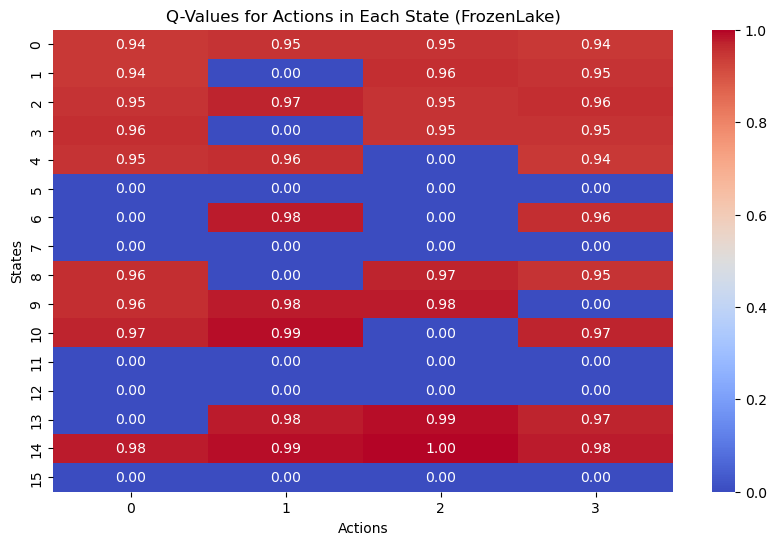

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(q_table, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Q-Values for Actions in Each State (FrozenLake)")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()
